In [1]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from statsmodels.tsa.statespace.varmax import VARMAX

In [2]:
import kagglehub, os
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")
df = pd.read_csv(os.path.join(path, "Microsoft_Stock.csv"))

In [3]:
df["Date"] = pd.to_datetime(df["Date"])
df = df.sort_values("Date")
df.set_index("Date", inplace=True)
data = df[["Open", "High", "Low", "Close"]]


In [4]:
data

,Open,High,Low,Close
Date,,,,
2015-04-01 16:00:00,40.60,40.76,40.31,40.72
2015-04-02 16:00:00,40.66,40.74,40.12,40.29
2015-04-06 16:00:00,40.34,41.78,40.18,41.55
2015-04-07 16:00:00,41.61,41.91,41.31,41.53
2015-04-08 16:00:00,41.48,41.69,41.04,41.42
...,...,...,...,...
2021-03-25 16:00:00,235.30,236.94,231.57,232.34
2021-03-26 16:00:00,231.55,236.71,231.55,236.48
2021-03-29 16:00:00,236.59,236.80,231.88,235.24


In [5]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)
scaled_df = pd.DataFrame(scaled_data, columns=data.columns, index=data.index)


In [6]:
test_obs = 28
train = scaled_df[:-test_obs]
test = scaled_df[-test_obs:]

In [8]:
p_values = [0, 1, 2, 3]
q_values = [0, 1, 2]

best_aic = float("inf")
best_order = None
best_model = None
print("🔍 Selecting best (p,q) based on AIC ...\n")

🔍 Selecting best (p,q) based on AIC ...



In [9]:
for p, q in itertools.product(p_values, q_values):
    try:
        model = VARMAX(train, order=(p, q))
        result = model.fit(disp=False)+
        print(f"(p,q)=({p},{q}) | AIC={result.aic:.4f}")
        if result.aic < best_aic:
            best_aic = result.aic
            best_order = (p, q)
            best_model = result
    except Exception as e:
        print(f"(p,q)=({p},{q}) failed: {e}")
        continue

print(f"\n✅ Best order found: (p,q)={best_order} with AIC={best_aic:.4f}")

(p,q)=(0,0) failed: Invalid VARMAX(p,q) specification; at least one p,q must be greater than zero.


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(0,1) | AIC=-17463.5646


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(0,2) | AIC=-29729.8999


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(1,0) | AIC=-19521.3132


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(1,1) | AIC=-11379.2294


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(1,2) | AIC=-29927.3596


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(2,0) | AIC=-19556.3866


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(2,1) | AIC=-19886.0929


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


(p,q)=(2,2) | AIC=4651.5256


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(3,0) | AIC=-20032.9931


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(3,1) | AIC=-19841.1766


C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(p,q)=(3,2) | AIC=-19893.4696

✅ Best order found: (p,q)=(1, 2) with AIC=-29927.3596


In [10]:
final_model = VARMAX(train, order=best_order)
final_result = final_model.fit(disp=False)
print("\nModel Summary:\n")
print(final_result.summary())

C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:160: EstimationWarning: Estimation of VARMA(p,q) models is not generically robust, due especially to identification issues.
  warn('Estimation of VARMA(p,q) models is not generically robust,'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\statespace\varmax.py:373: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "



Model Summary:

                                  Statespace Model Results                                  
Dep. Variable:     ['Open', 'High', 'Low', 'Close']   No. Observations:                 1483
Model:                                   VARMA(1,2)   Log Likelihood               15025.680
                                        + intercept   AIC                         -29927.360
Date:                              Tue, 11 Nov 2025   BIC                         -29598.647
Time:                                      10:15:00   HQIC                        -29804.832
Sample:                                           0                                         
                                             - 1483                                         
Covariance Type:                                opg                                         
Ljung-Box (L1) (Q):     1470.00, 167.10, 764.45, 18.43   Jarque-Bera (JB):   186.59, 23491.29, 29063.48, 11222.36
Prob(Q):                        

In [11]:
forecast = final_result.forecast(steps=test_obs)
forecast.index = test.index

C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Anaconda3\envs\aimj\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [12]:
forecast_inv = pd.DataFrame(
    scaler.inverse_transform(forecast),
    columns=forecast.columns,
    index=forecast.index
)
test_inv = pd.DataFrame(
    scaler.inverse_transform(test),
    columns=test.columns,
    index=test.index
)

In [13]:
performance = {}
for col in data.columns:
    rmse = mean_squared_error(test_inv[col], forecast_inv[col], squared=False)
    mape = mean_absolute_percentage_error(test_inv[col], forecast_inv[col])
    performance[col] = {"RMSE": rmse, "MAPE": mape}

perf_df = pd.DataFrame(performance).T
print("\n📊 Performance Summary:")
print(perf_df)



📊 Performance Summary:
             RMSE      MAPE
Open   116.425265  0.497250
High   117.656373  0.497331
Low    113.635172  0.490026
Close  114.971364  0.491784


C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Anaconda3\envs\aimj\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function

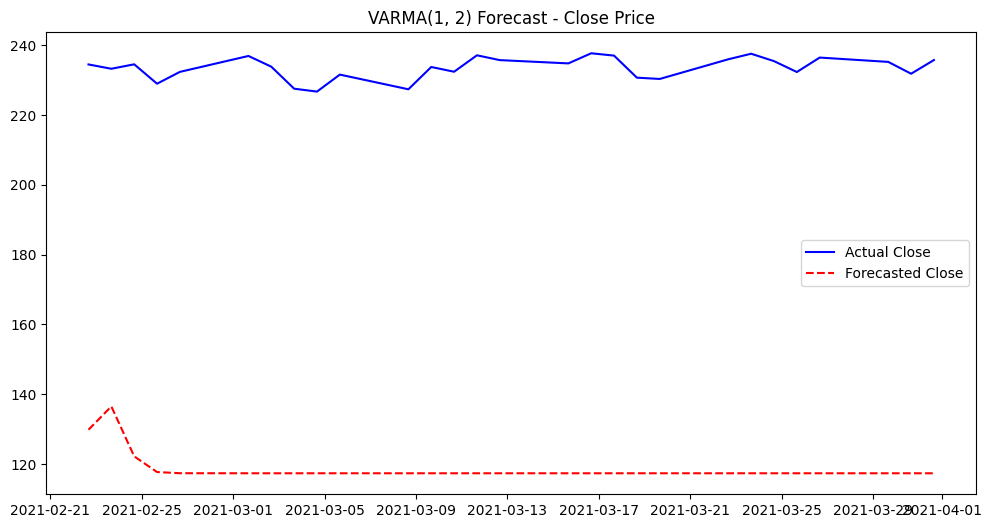

In [14]:
plt.figure(figsize=(12,6))
plt.plot(test_inv["Close"], label="Actual Close", color="blue")
plt.plot(forecast_inv["Close"], label="Forecasted Close", color="red", linestyle="--")
plt.title(f"VARMA{best_order} Forecast - Close Price")
plt.legend()
plt.show()
